In [1]:
import pandas as pd

In [2]:
train = pd.read_excel(r'C:/Users/Шоби/Desktop/train.xlsx')

# 1 задание

In [24]:
train

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


In [31]:
train['Order Date'].min()

Timestamp('2015-01-03 00:00:00')

In [29]:
train['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [20]:
train['Sub-Category'].value_counts().head(4)

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: Sub-Category, dtype: int64

In [26]:
train_last2years = train[train['Order Date'] >= (train['Order Date'].max() - pd.DateOffset(years=2))]
train_last2years['Sub-Category'].value_counts().head(4)

Binders        907
Paper          810
Furnishings    558
Phones         511
Name: Sub-Category, dtype: int64

In [27]:
train_lastyear = train[train['Order Date'] >= (train['Order Date'].max() - pd.DateOffset(years=1))]
train_lastyear['Sub-Category'].value_counts().head(4)

Binders        496
Paper          454
Furnishings    310
Phones         291
Name: Sub-Category, dtype: int64

За всё время, последние два года и последний год самыми продаваемыми товарами неизменно остаются Binders,Paper,Furnishings,Phones. По вышестоящим данным можно сказать, что динамика продаж этих категорий довольно стабильна.

# 2 задание

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
train['Sales'].max()

44995.41

<AxesSubplot:xlabel='Sales'>

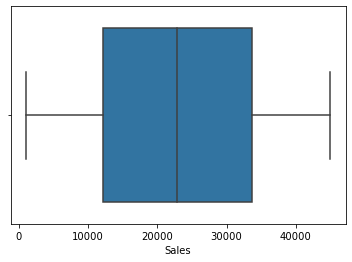

In [59]:
sns.boxplot(x  = train['Sales'])

In [84]:
#lower_bound = train.Sales.quantile(q=0.025)
#upper_bound = train.Sales.quantile(q=0.975)
#train1 = train[(train.Sales > lower_bound) | (train.Sales < upper_bound)]

In [85]:
#sns.boxplot(x  = train1['Sales'])


Как мы видим данные распределены очень симметрично, медиана находится примерно на уровне 22тысяч. Выбросы не наблюдаются.

# 3 задание

In [64]:
m = train['Sales'].max()
m

44995.41

In [75]:
def f(x):
    if x<m/3:
        return 'Low sales'
    elif x <= (2*m)/3:
        return 'Average sales'
    else:
        return 'High sales'

In [76]:
train['Sale_group'] = train['Sales'].apply(f)

In [77]:
train

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080,High sales
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,Average sales
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860,High sales
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,Low sales
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130,Average sales
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,Low sales
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050,Average sales
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810,Average sales
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,Low sales


In [83]:
train.groupby(['Sale_group','Region']).sum('Sales')

ID         Sales
Sale_group    Region                            
Average sales Владивосток  4405382  2.074352e+07
              Калиниград   5542901  2.560134e+07
              Москва       2797376  1.241028e+07
              Урал         3755770  1.752143e+07
High sales    Владивосток  4658059  3.605261e+07
              Калиниград   4929022  3.814469e+07
              Москва       2709333  2.046954e+07
              Урал         3870007  2.846870e+07
Low sales     Владивосток  4386859  7.156561e+06
              Калиниград   4875944  8.184268e+06
              Москва       2489216  4.011830e+06
              Урал         3605031  5.868462e+06

По всем группам продаж лидирует Калининград.За ней с небольшим отставанием идёт Владивосток. Ниже находится Урал. Москва же  имеет самый низкий уровень продаж. 